In [1]:
# following tutorial in https://realpython.com/python-opencv-color-spaces/ using kaggle meme image data, 
# at https://www.kaggle.com/sayangoswami/reddit-memes-dataset/data#db.json

import cv2
import matplotlib.pyplot as plt
import numpy as np
# for making color scatter plots of the pixels
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
# for displaying the selected hsv color in rgb
from matplotlib.colors import hsv_to_rgb

In [2]:
# save opencd color conversions into a variable
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

# checks: 
len(flags)
flags[40]
type(flags)

list

<class 'numpy.ndarray'>
(540, 960, 3)


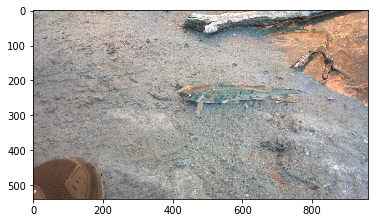

In [3]:
meme1 = cv2.imread('../data/reddit-memes-dataset/memes/memes/2bvcu7.jpg')
print(type(meme1)); print(meme1.shape)
plt.imshow(meme1)
plt.show()

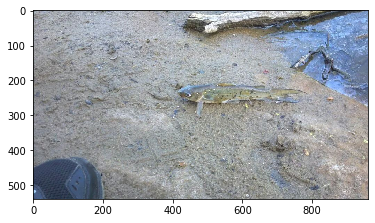

In [23]:
# opencd automatically reads images in BGR format, so change it to RGB to get the correct image
meme1 = cv2.cvtColor(meme1, cv2.COLOR_BGR2RGB)
plt.imshow(meme1)
plt.show()

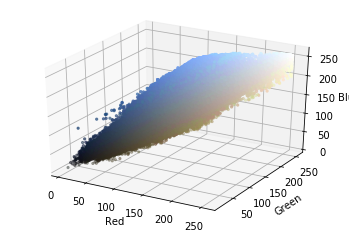

In [30]:
# we can make a color scatter plot of the pixels:

# opencv split() splits image into its color component channels
# results in a numpy.ndarray of the int r, g or b values for every pixel in the image
# could sum over these two find which is the stronges color component in the image, would this be slow?
r, g, b = cv2.split(meme1)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

# normalize pixel colors, represent in 0-1 range rather than 0-255, and put them in list format
pixel_colors = meme1.reshape((np.shape(meme1)[0]*np.shape(meme1)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

# then they are in the format that facecolors expects
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

# takes a long time to make this plot

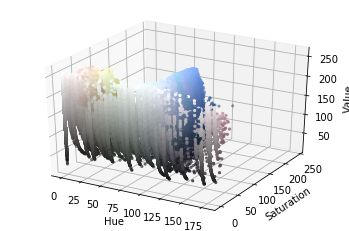

In [35]:
# you can also view this information in HSV (hue saturation value)
hsv_meme1 = cv2.cvtColor(meme1, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_meme1)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

# higher "value" for brighter more initially visually salient colors
# could see if the proportion of value sum to total hsv sum affects popularity of image

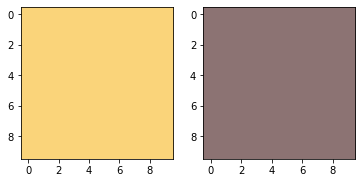

In [43]:
# select a certain color range in hsv and display it in rgb
fish_color_1 = (0, 45, 140)
fish_color_2 = (30, 130, 250)

lo_square = np.full((10, 10, 3), fish_color_1, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), fish_color_2, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

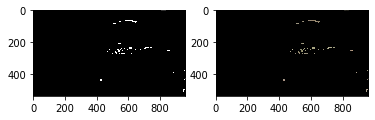

In [44]:
# mask the image to try and isolate the fish by choosing it's color range
mask = cv2.inRange(hsv_meme1, fish_color_1, fish_color_2)
result = cv2.bitwise_and(meme1, meme1, mask=mask)
# show just the mask and the result (image with the mask)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [ ]:
# the fish isn't so easy to isolate because it's a similar color to its surroundings
# this technique can be used to identify common items in photos, but objects in meme photos
# probably aren't uniform enough for this to be useful. There are pre-trained neural nets that
# would do a better job with this, even if we need to re-train them we could leaverage their prior training.

# check if having a certain color impacts meme popularity (extract color: average, sum, rgb, hsv or something else?)
# check if complexity of the color display impacts popularity (high or low variety in color space)